# Mexico Antenna exploration and processing
La idea es

* Catalogar antenas por sus provincias 
* Graficar el mapa de Mexico con sus antennas
* limpiar aquellas que caigan "al agua"
* Catalogar las antenas como pertenecientes o no a regiones del *"Gran Chaco"* mejicano

## definicion utilizada

In [ ]:
import pandas as pd; import numpy as np; import os;import random;
pd.set_option('display.max_rows', 300)
#from matplotlib import pyplot as plt
#%matplotlib inline
import unicodedata
import gzip

In [ ]:
import geopandas as gpd;
from geopandas.geoseries import *
import shapely

In [3]:
np.random.seed(2015)

In [4]:
global mapa

In [6]:
rootdir = '/home/juan/mobility-study'

In [7]:
mapa = gpd.GeoDataFrame.from_file(rootdir+'/mapas/national_estatal.geojson')

In [8]:
mapa[mapa['NOMBRE']==u'Chiapas']

,CVEGEO,NOMBRE,OID,POB1,POB10,POB10_R,POB11,POB11_R,POB12,POB12_R,...,POB7_R,POB8,POB80,POB80_R,POB81,POB81_R,POB8_R,POB9,POB9_R,geometry
6,07,Chiapas,7,4796580,968252,20.2,1334789,27.8,2860151,59.6,...,6.9,1645047,116587,5,78285,3.3,34.3,326491,6.8,POLYGON ((-91.97363681088724 17.91143118947898...


In [43]:
antenas = pd.read_csv(gzip.open("surrogated_antennas.txt.gz"),sep=" ")
#paso lat y long a su forma decimal
antenas['LATITUDE']=antenas['LATITUDE']*1.0/1000
antenas['LONGITUDE']=antenas['LONGITUDE']*1.0/1000

#chequeo resultados rapido
antenas.loc[np.random.permutation(antenas.index)[:100]]

,ID,LATITUDE,LONGITUDE
2291,2722,19.686,-99.049
1998,2445,19.504,-99.081
3852,4455,25.663,-100.359
1660,3269,19.427,-99.220
71,2068,16.746,-93.120
2881,1843,20.697,-103.358
3430,3577,22.283,-97.828
2214,1100,19.627,-99.417
2707,1826,20.622,-100.188
2921,1814,20.716,-103.392


In [34]:
#chequeo si hay info faltante
antenas[pd.isnull(antenas).any(axis=1)]

,ID,LATITUDE,LONGITUDE


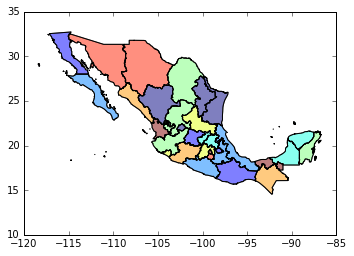

In [34]:
mapa.plot()

# Muy importante!
 
Las coordenadas en un mapa se dan en (lat, long) que no corresponden a las coordenadas cartesianas sino a (y,x) con lo cual es importante armar los **Point** con (long,lat), sino imposible comprarar quien esta dentro de que..

In [44]:
subset =  antenas[['LONGITUDE','LATITUDE']]
tuples = [shapely.geometry.Point(x) for x in subset.values] 
global antenas_gpd 
antenas_gpd =  gpd.GeoSeries(tuples)

In [36]:
multipoligono = mapa['geometry'].ix[6]
multipoligono.contains(antenas_gpd.ix[2])

True

In [15]:
def preparar_nombre(s):
        #esta linea elimina las tildes espacios puntos y similar"
        sin_tilde = ''.join((c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn'))
        limpio = sin_tilde.replace(" ","_").replace(".","")
        #me quedo con el nombre corto de Veracruz
        if limpio == u'Veracruz_de_Ignacio_de_la_Llave':
            limpio = u'Veracruz'
        return limpio

In [37]:
mapa['NOMBRE'] = mapa['NOMBRE'].apply(lambda s: preparar_nombre(s))

In [17]:
def get_state_name(ant,lista_de_geometrias,lista_de_nombres):
        sol ="Error";
        for i in range(len(lista_de_geometrias)):
            if lista_de_geometrias.ix[i].contains(ant):
                sol = lista_de_nombres[i]
                break
        return sol

In [38]:
len(antenas_gpd)

4464

In [53]:
%timeit antenas_gpd.ix[1:100].apply(lambda ant: get_state_name(ant, mapa['geometry'],mapa.NOMBRE.values))


1 loops, best of 3: 1.51 s per loop


In [45]:
antenas['STATE'] = antenas_gpd.apply(lambda ant: get_state_name(ant, mapa['geometry'],mapa.NOMBRE.values))

In [40]:
#miro aquellas que no pude hacerlo sistematicamente y veo si las elimino o las "corro"
antenas[antenas['STATE']=="Error"]

,ID,LATITUDE,LONGITUDE,STATE
3267,2614,21.183,-86.807,Error
3500,4293,23.005,-109.714,Error
3537,1974,23.258,-106.463,Error


In [27]:
set(antenas.STATE.values.tolist())

{u'Aguascalientes',
 u'Baja_California',
 u'Baja_California_Sur',
 u'Campeche',
 u'Chiapas',
 u'Chihuahua',
 u'Coahuila_de_Zaragoza',
 u'Colima',
 u'Distrito_Federal',
 u'Durango',
 'Error',
 u'Guanajuato',
 u'Guerrero',
 u'Hidalgo',
 u'Jalisco',
 u'Mexico',
 u'Michoacan_de_Ocampo',
 u'Morelos',
 u'Nayarit',
 u'Nuevo_Leon',
 u'Oaxaca',
 u'Puebla',
 u'Queretaro',
 u'Quintana_Roo',
 u'San_Luis_Potosi',
 u'Sinaloa',
 u'Sonora',
 u'Tabasco',
 u'Tamaulipas',
 u'Tlaxcala',
 u'Veracruz',
 u'Yucatan',
 u'Zacatecas'}

In [52]:
#chequeo nuevamente
antenas[antenas['STATE']=="Error"]

,ID,LATITUDE,LONGITUDE,STATE


In [53]:
antenas.at[antenas['STATE']==u'Veracruz_de_Ignacio_de_la_Llave','STATE']=u'Veracruz'

In [54]:
#asigno a mano aquellas que me habin quedado un toque afuera
antenas.at[3267,'LONGITUDE']=-86.857
antenas.at[3267,'STATE']=u'Quintana_Roo'
antenas.at[3500,'LATITUDE']=23.055
antenas.at[3500,'STATE']=u'Baja_California_Sur'
antenas.at[3537,'LONGITUDE']=-106.403
antenas.at[3537,'STATE']=u'Sinaloa'

## Ahora vemos cuales son del Gran Chaco

recordar que estas son las que estan en los estados de Jalisco, Oaxaca, Veracruz, Guerrero,Morelos, Yucatan, Queretaro, Chiapas, Puebla, Nayarit, Hidalgo y Tabasco.

In [55]:
def get_epidemic_state(estado):
    sol=0
    epidemicos =  [u'Jalisco', u'Oaxaca', u'Puebla', u'Queretaro',u'Veracruz', u'Guerrero',u'Morelos', \
                     u'Nayarit',u'Yucatan',u'Chiapas',u'Tabasco',u'Hidalgo']
    if estado in epidemicos:
        sol =1
    return sol    

In [56]:
antenas['EPIDEMIC']=antenas['STATE'].apply(lambda k: get_epidemic_state(k))

In [57]:
antenas.loc[np.random.permutation(antenas.index)[:30]]

,ID,LATITUDE,LONGITUDE,STATE,EPIDEMIC
280,2458,18.011,-92.947,Tabasco,1
630,147,19.046,-100.064,Mexico,0
958,1739,19.294,-99.669,Mexico,0
1398,1489,19.388,-99.240,Distrito_Federal,0
1912,4425,19.475,-99.225,Mexico,0
1154,872,19.346,-99.590,Mexico,0
3955,4073,25.740,-100.404,Nuevo_Leon,0
2117,1717,19.550,-99.030,Mexico,0
2995,3021,20.904,-100.416,Guanajuato,0
622,1681,19.043,-98.055,Puebla,1


In [60]:
antenas.EPIDEMIC.sum()

1386

In [64]:
len(antenas),antenas.EPIDEMIC.sum(),antenas.EPIDEMIC.sum()*1.0/len(antenas)

(4464, 1386, 0.31048387096774194)

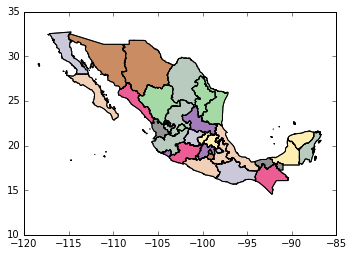

In [25]:
fig = plt.figure(figsize=(5,5),dpi=300)

In [28]:
 mapa[['geometry','NOMBRE']].plot(colormap='Accent', alpha=0.7,figsize=(10,10),dpi=300)

TypeError: plot_dataframe() got an unexpected keyword argument 'figsize'

In [69]:
antenas.to_csv(rootdir +"/surrogated_antennas_complete.txt",index=False,sep="|")

In [82]:
epidemic_antennas = antenas[antenas['EPIDEMIC'] ==1]['ID']

In [84]:
type(epidemic_antennas)

pandas.core.series.Series

In [85]:
epidemic_antennas.to_csv(rootdir +"/surrogated_antennas_epidemic.txt",index=False)